<a href="https://colab.research.google.com/github/zezinjr/Iniciandojornada/blob/main/Clusteriza%C3%A7%C3%A3o_e_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale, PowerTransformer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import kelbow_visualizer
from sklearn.mixture import GaussianMixture

In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


In [ ]:
#Verificação dos dados(Data Understanding)
df = pd.read_csv('data.csv', encoding= 'unicode_escape')
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Informação dos dados citados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Verificando os valores de uma coluna específica
df.InvoiceNo.sort_values()

,InvoiceNo
0,536365
1,536365
2,536365
3,536365
4,536365
...,...
540449,C581490
541541,C581499
541715,C581568
541716,C581569


In [ ]:
#Valores únicos nas seguintes colunas
df[['Description', 'Country']].nunique()

,0
Description,4223
Country,38


In [ ]:
#Descrição dos valores já verificados
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


<Axes: ylabel='Country'>

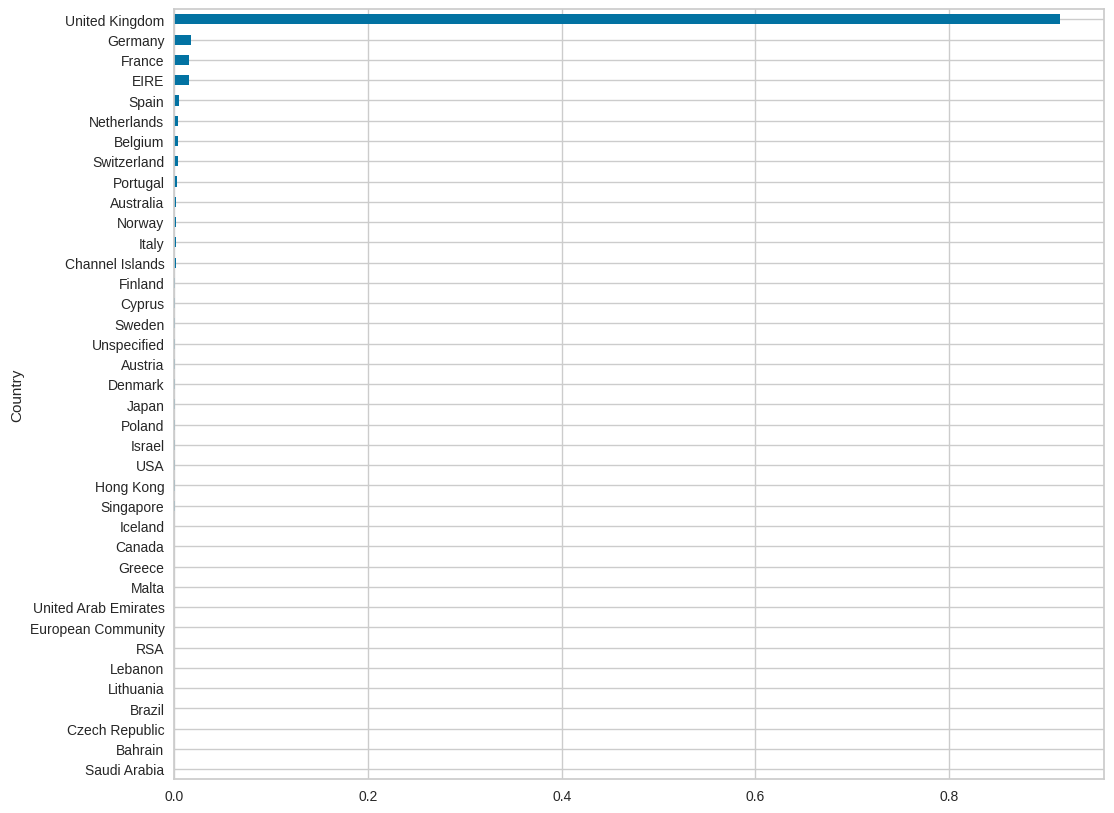

In [ ]:
#Plotagem gráfica dos países
df['Country'].value_counts(normalize=True, ascending=True).plot.barh(figsize=(12,10))

In [ ]:
#Distribuição de sequência dos valores
df.stb.freq(['Country'])

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [ ]:
#Análise do total de valores nulos
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
#Análise dos valores duplicados
df.duplicated().sum()

5268

In [ ]:
#Quantidade de valores ou espaços faltantes
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [ ]:
#Remoção de coluna nula
df = df.dropna(subset=['CustomerID'])

In [ ]:
df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [ ]:
#Mudança de variáveis
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

<ipython-input-18-62cc83454370>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['Country'] = df['Country'].astype('category')

<ipython-input-20-8861d7906295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
<ipython-input-20-8861d7906295>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype('category')


In [ ]:
df = df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 25.2+ MB


In [ ]:
df.InvoiceDate.agg(['min','max'])

,InvoiceDate
min,2010-12-01 08:26:00
max,2011-12-09 12:50:00


In [ ]:
below0 = df[['Quantity', 'UnitPrice']].le(0).any(axis=1)
df = df[~below0].copy()

In [ ]:
df = df

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


<Axes: >

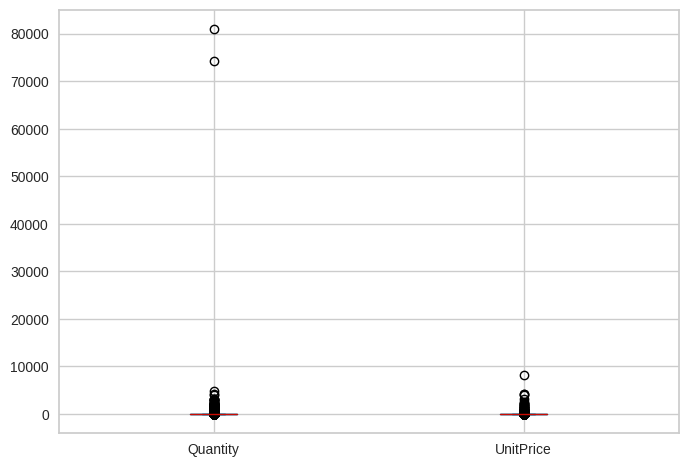

In [ ]:
#Verificando ourliers
df[['Quantity', 'UnitPrice']].plot.box()

In [ ]:
#importando valores contidos no outlier
df.query('Quantity>10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


<Axes: >

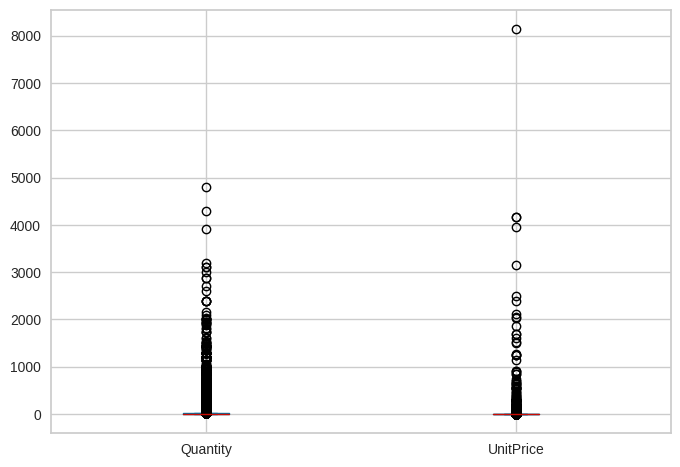

In [ ]:
df.query('Quantity<10_000')[['Quantity', 'UnitPrice']].plot.box()

In [ ]:
df.query('UnitPrice>8_000 & Quantity<10_000')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom


In [ ]:
df['PriceTotal'] = df.Quantity * df.UnitPrice
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PriceTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [ ]:
#Criação do gráfico de RFM
df_rfm = (df.groupby('CustomerID').agg(R = ('InvoiceDate', lambda x: (pd.Timestamp('2012-01-01') - x.max()).days),
                                       F = ('InvoiceNo', 'nunique'),
                                       M = ('PriceTotal', 'mean')))
df_rfm

,R,F,M
CustomerID,,,
12346,347,1,77183.600000
12347,24,7,23.681319
12348,97,4,57.975484
12349,40,1,24.076027
12350,332,1,19.670588
...,...,...,...
18280,299,1,18.060000
18281,202,1,11.545714
18282,29,2,14.837500


<Axes: >

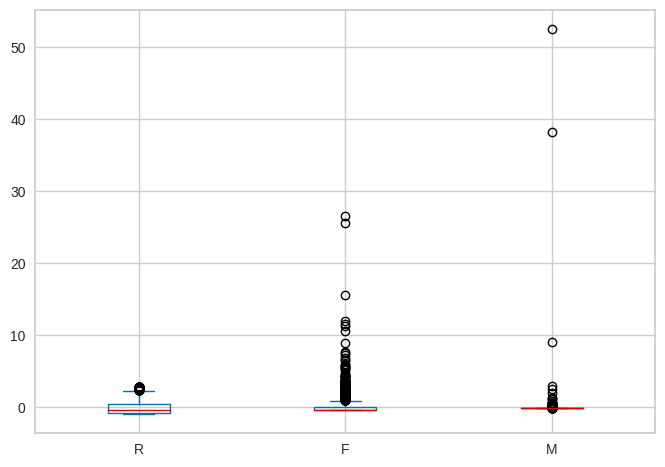

In [ ]:
df_rfm.apply(scale).plot.box()

In [ ]:
df_rfm.apply(scale).query('M>50')

,R,F,M
CustomerID,,,
12346,2.329388,-0.425097,52.539782


In [ ]:
df.query('CustomerID == 15098')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PriceTotal
222670,556442,22502,PICNIC BASKET WICKER SMALL,60,2011-06-10 15:22:00,4.95,15098,United Kingdom,297.0
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.50,15098,United Kingdom,649.5


In [ ]:
scaler = PowerTransformer()

In [ ]:
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)
df_rfm_scaled

,R,F,M
CustomerID,,,
12346,1.606563,-1.158367,3.926205
12347,-1.562455,1.202090,0.408435
12348,0.323306,0.660807,1.317575
12349,-0.808810,-1.158367,0.427292
12350,1.568057,-1.158367,0.191221
...,...,...,...
18280,1.475248,-1.158367,0.087794
18281,1.106997,-1.158367,-0.488856
18282,-1.274460,-0.195753,-0.158358


<Axes: >

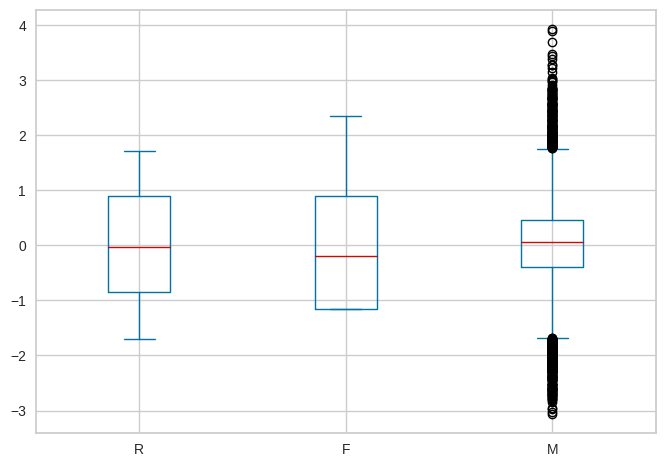

In [ ]:
df_rfm_scaled.plot.box()

In [ ]:
scaler.inverse_transform(df_rfm_scaled)

array([[3.47000000e+02, 1.00000000e+00, 7.71836000e+04],
       [2.40000000e+01, 7.00000000e+00, 2.36813187e+01],
       [9.70000000e+01, 4.00000000e+00, 5.79754839e+01],
       ...,
       [2.90000000e+01, 2.00000000e+00, 1.48375000e+01],
       [2.50000000e+01, 1.60000000e+01, 2.77100529e+00],
       [6.40000000e+01, 3.00000000e+00, 2.62468571e+01]])

In [ ]:
df_rfm.describe()

,R,F,M
count,4338.000000,4338.000000,4338.000000
mean,114.059474,4.272015,68.350506
std,100.012264,7.697998,1467.918896
min,22.000000,1.000000,2.101286
25%,39.000000,1.000000,12.365367
50%,72.000000,2.000000,17.723119
75%,163.750000,5.000000,24.858417
max,395.000000,209.000000,77183.600000


In [ ]:
df_rfm_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))
df_rfm_clip.describe()

,R,F,M
count,4338.000000,4338.000000,4338.000000
mean,112.272937,3.607653,23.783703
std,95.545467,3.358326,21.377221
min,22.000000,1.000000,2.101286
25%,39.000000,1.000000,12.365367
50%,72.000000,2.000000,17.723119
75%,163.750000,5.000000,24.858417
max,333.000000,13.000000,93.682961


In [ ]:
df_rfm_clip_scaled = df_rfm_clip.apply(scale)
df_rfm_clip_scaled.describe()

,R,F,M
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,8.189750e-19,3.275900e-18,6.551800e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.449254e-01,-7.765636e-01,-1.014394e+00
25%,-7.669792e-01,-7.765636e-01,-5.341972e-01
50%,-4.215541e-01,-4.787619e-01,-2.835393e-01
75%,5.388324e-01,4.146432e-01,5.027959e-02
max,2.310445e+00,2.797057e+00,3.270178e+00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

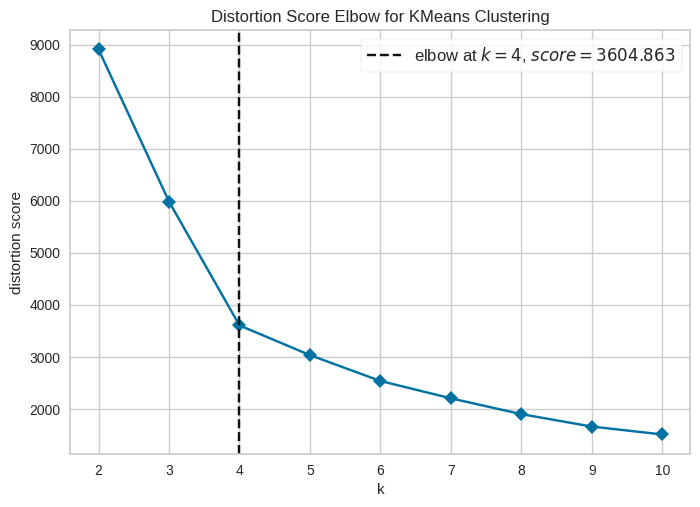

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
#Visualização de clusterização de dados
kelbow_visualizer(KMeans(), df_rfm_clip_scaled, k=10, timings=False)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_clip_scaled.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k':k}
  #cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X,labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[{'k': 2,
  'silhouette_score': 0.38369072875816157,
  'davies_bouldin_score': 1.063465543588209,
  'calinski_harabasz_score': 1997.022993679683},
 {'k': 3,
  'silhouette_score': 0.4347881031721198,
  'davies_bouldin_score': 0.8596321700074868,
  'calinski_harabasz_score': 2545.6999228545656},
 {'k': 4,
  'silhouette_score': 0.4805058919168804,
  'davies_bouldin_score': 0.7022956563544677,
  'calinski_harabasz_score': 3770.7658238574586},
 {'k': 5,
  'silhouette_score': 0.48573227834897376,
  'davies_bouldin_score': 0.7372167611933881,
  'calinski_harabasz_score': 3563.3614975465102},
 {'k': 6,
  'silhouette_score': 0.3986119480642503,
  'davies_bouldin_score': 0.8490701722042964,
  'calinski_harabasz_score': 3577.975110436049},
 {'k': 7,
  'silhouette_score': 0.3776134562472274,
  'davies_bouldin_score': 0.8679775732214867,
  'calinski_harabasz_score': 3541.0840759139555},
 {'k': 8,
  'silhouette_score': 0.384831622961628,
  'davies_bouldin_score': 0.8700827306092858,
  'calinski_hara

In [ ]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.383691,1.063466,1997.022994
3,0.434788,0.859632,2545.699923
4,0.480506,0.702296,3770.765824
5,0.485732,0.737217,3563.361498
6,0.398612,0.849070,3577.975110
7,0.377613,0.867978,3541.084076
8,0.384832,0.870083,3619.147123
9,0.395319,0.801832,3699.038891
10,0.353022,0.886740,3667.829542


In [ ]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_rfm_clip_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Análise 3d com a importação dos dados já com o RFM calculado, sendo possível a filtração e manipulação dos dados inseridos
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

In [ ]:
hclust = AgglomerativeClustering(n_clusters=4)
hclust_labels = hclust.fit_predict(df_rfm_clip_scaled)

In [ ]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']
X = df_rfm_clip_scaled.copy()

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, n_init=10, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({'bic':mclust.bic(X),
                    'n_components':n_components,
                    'covariance_type':covariance_type})

results = pd.DataFrame(results)
results.sort_values('bic').head()

,bic,n_components,covariance_type
30,-185.205166,8,diag
28,-65.329131,8,full
26,119.560640,7,diag
24,129.897678,7,full
20,9292.528366,6,full


<Axes: xlabel='n_components', ylabel='bic'>

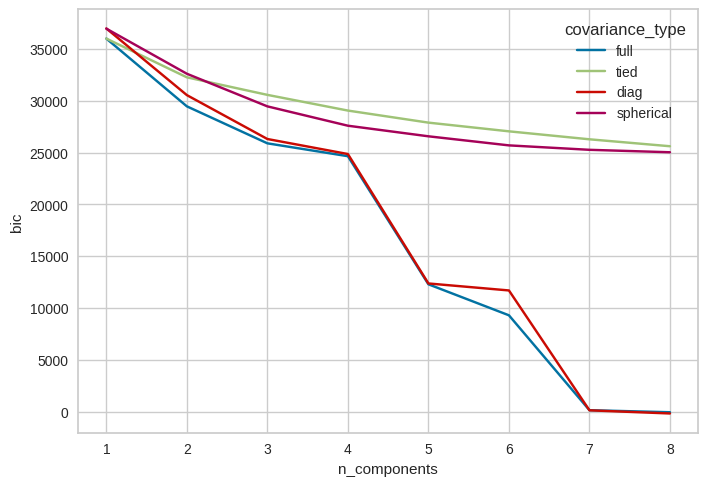

In [ ]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type')

In [ ]:
mclust = GaussianMixture(n_components=7, covariance_type='diag', n_init=10)
mclust_labels = mclust.fit_predict(df_rfm_scaled)

In [ ]:
px.scatter_3d(df_rfm_clip, x='R', y='F', z='M', color=mclust_labels.astype(str), template='plotly_dark')

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_rfm_clip_scaled)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_clip_scaled.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



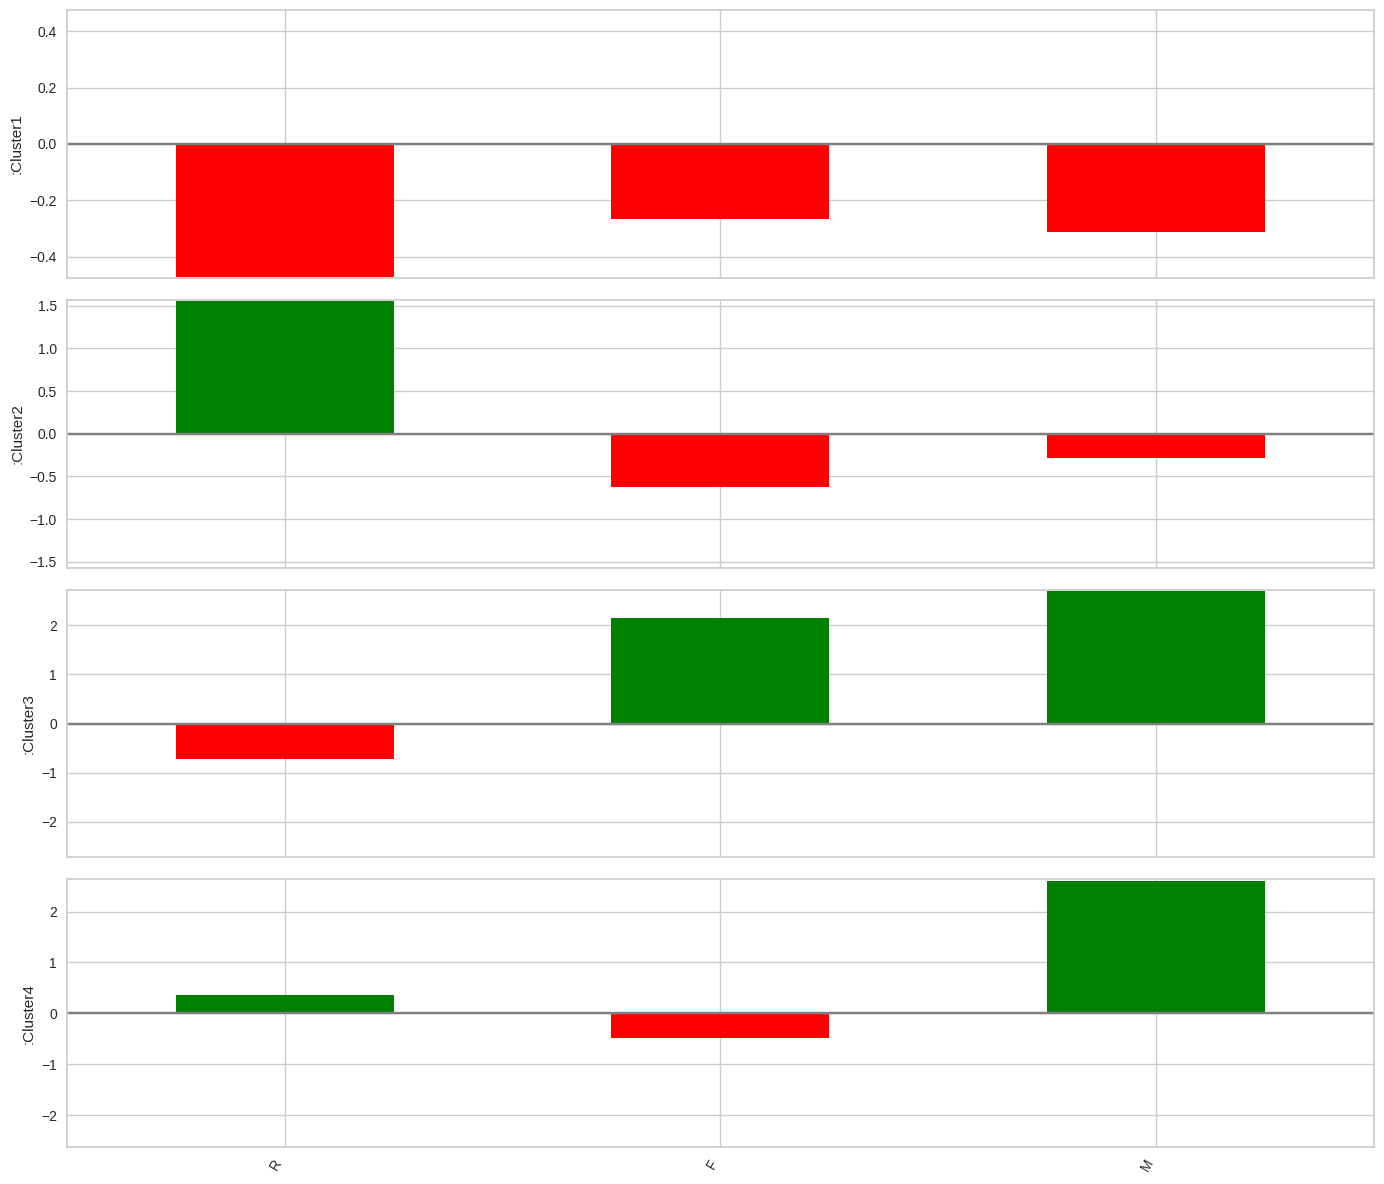

In [ ]:
#Clusterizações sendo comparadas para visualizar a de melhor resultado
fig, axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i, ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green'if l>0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f':Cluster{i+1}')
  ax.set_ylim(-maxPC,maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
(df_rfm_clip.assign(cluster=kmeans_labels).groupby('cluster').mean().transpose().style.background_gradient(cmap='YlOrRd', axis=1))

cluster,0,1,2,3
R,67.581029,41.522654,121.419847,261.043033
F,2.701404,10.192557,3.885496,1.509221
M,17.177482,20.506865,82.325585,18.199021
